In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pathlib

In [9]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)  # Use Path instead of path
image_count = len(list(data_dir.glob('*/*.jpg')))


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/root/.keras/datasets/flower_photos/roses/3560426426_1c66cb8330.jpg


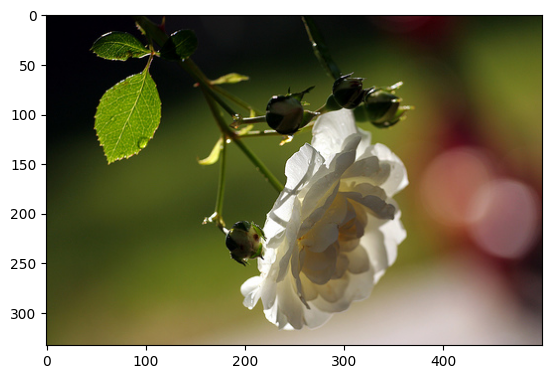

In [11]:
import matplotlib.pyplot as plt
roses =list(data_dir.glob('roses/*'))
print(roses[0])
img = plt.imread(str(roses[0])) # Use plt.imread to read the image
plt.imshow(img)
plt.show()


In [12]:
img_height, img_width =150,150
batch_size=32
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [15]:
resnet_model=Sequential()
# The function name has been corrected from 'rasnet50' to 'ResNet50'
pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                                                input_shape=(150,150,3),
                                                pooling='avg',classes=5,
                                                weights='imagenet'
                                                )
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
epochs=10
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.6560 - loss: 1.1829 - val_accuracy: 0.8610 - val_loss: 0.4085
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8974 - loss: 0.2744 - val_accuracy: 0.8665 - val_loss: 0.4013
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9413 - loss: 0.1652 - val_accuracy: 0.8651 - val_loss: 0.3770
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9801 - loss: 0.0786 - val_accuracy: 0.8678 - val_loss: 0.4181
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9908 - loss: 0.0437 - val_accuracy: 0.8597 - val_loss: 0.4399
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9916 - loss: 0.0308 - val_accuracy: 0.8801 - val_loss: 0.4386
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9991 - loss: 0.0131 - val_accuracy: 0.8896 - val_loss: 0.4257
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.8856 

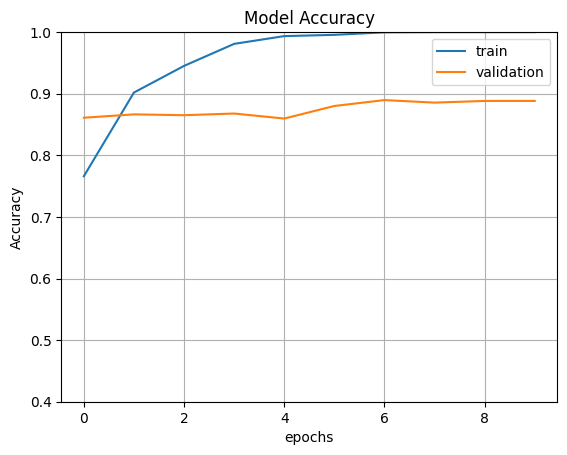

In [19]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [20]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized=cv2.resize(image,(img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print (image.shape)


(1, 150, 150, 3)


In [ ]:
pred=rasnet_model.predict (image)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.32467183 0.01964668 0.1666228  0.16388737 0.3251713 ]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("the predicted class is " , output_class)

the predicted class is  tulips


In [21]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,742,673 (102.02 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,103,308 (8.02 MB)